## Searching Abstracts


In [40]:
#search for abstracts with ONE species and ONE quinone discovery/findings
#extract the species names and genus names from title
#search for "only" or !"predominant, main, major" near the quinone match


In [41]:
#allows for multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from collections import Counter

#### With New Dictionary

In [42]:
#still need to work on improving the dictionary


In [43]:
quinones = {
"q": ["quinone", "{},{}-benzoquinone", "{},{}-dimethyl-{},{}-benzoquinone", "{}-methyl-{},{}-naphthoquinone", "{},{}-dimethoxy-{},{}-naphthoquinone", "{},{},{},{}-tetramethyl-{},{}-benzoquinone"],
"uq": ["ubiquinone", "coenzyme Q", "coQ", "UQ", "Ubiquinone{}", "Coenzyme Q{}", "CoQ{}"],
"uq-{}": ["UQ{}", "UQ{}H{}", "UQ{}H{}", "ubiquinone-{}", "ubiquinone-{}(H{})", "ubiquinone-{}(H{})", "Ubiquinone-{}", "Ubiquinone-{}(H{})", "Ubiquinone-{}(H{})"],
"mk": ["menaquinone", "vitamin K2", "MK", "Menaquinone", "Vitamin K2"],
"mk-{}": ["MK{}", "MK{}H{}", "MK{}H{}", "menaquinone-{}", "menaquinone-{}(H{})", "menaquinone-{}(H{})", "Menaquinone-{}", "Menaquinone-{}(H{})", "Menaquinone-{}(H{})"],
"pq": ["plastoquinone", "PQ", "Plastoquinone"],
"rhq": ["rhodoquinone", "RQ", "Rhodoquinone"],
"caldq": ["Caldariella quinone", "CQ", "Caldariella Quinone"],
"dmk": ["demethyl-menaquinone", "DMK", "Demethyl-menaquinone"],
"mmk": ["methyl-menaquinone", "MMK", "Methyl-menaquinone"],
"{}-mmk": ["{}-methyl-menaquinone", "{}-MMK", "{}-methyl-Menaquinone"],
"{}-mmk": ["{}-methyl-menaquinone", "{}-MMK", "{}-Methyl-menaquinone"],
"{},{}-dmmk": ["{},{}-dimethyl-menaquinone", "{},{}-DMMK", "{},{}-Dimethyl-menaquinone"]
}

#### Searching file with the new dictionary

In [44]:
species_genus_pattern = re.compile(r"[A-Z][a-z]*\s[a-z]*")

def extract_species_genus(title):
    return ", ".join(species_genus_pattern.findall(title))

def find_keyword_sentence(text, keyword):
    sentences = sent_tokenize(text)
    return "; ".join(sentence for sentence in sentences if keyword.lower() in sentence.lower())

def contains_quinone(row):
    matches = {}
    keyword_sentences = []

    for k, v in quinones.items():
        for term in v:
            pattern = term.format(*["\d+"] * term.count("{}"))
            regex = re.compile(pattern, re.IGNORECASE)

            match_in_title = regex.search(row["Title"])
            match_in_abstract = regex.search(row["Abstract"])

            if match_in_title or match_in_abstract:
                match_text = match_in_title.group(0) if match_in_title else match_in_abstract.group(0)

                if match_text not in matches:
                    matches[match_text] = []
                matches[match_text].append(k)

                keyword_sentence_title = find_keyword_sentence(row["Title"], match_text)
                keyword_sentence_abstract = find_keyword_sentence(row["Abstract"], match_text)

                if keyword_sentence_title:
                    keyword_sentences.append(keyword_sentence_title)
                if keyword_sentence_abstract:
                    keyword_sentences.append(keyword_sentence_abstract)

    if matches:
        matches_str = ", ".join(f"'{k}': ({', '.join(matches[k])})" for k in matches)
        return matches_str, "; ".join(keyword_sentences)
    else:
        return None, None

df = pd.read_csv("output500.csv")
df.fillna("", inplace=True)

df[["Quinone", "Keyword Sentence"]] = df.apply(contains_quinone, axis=1, result_type="expand")
df["Species and Genus"] = df["Title"].apply(extract_species_genus)

df = df[(~df["Quinone"].isnull())]
df.info()
df.head()
df.tail()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 50 to 1955
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Journal Name         259 non-null    object
 1   Year of Publication  259 non-null    object
 2   PubMedID             259 non-null    int64 
 3   Title                259 non-null    object
 4   Abstract             259 non-null    object
 5   Quinone              259 non-null    object
 6   Keyword Sentence     259 non-null    object
 7   Species and Genus    259 non-null    object
dtypes: int64(1), object(7)
memory usage: 18.2+ KB


,Journal Name,Year of Publication,PubMedID,Title,Abstract,Quinone,Keyword Sentence,Species and Genus
50,Antonie van Leeuwenhoek,2014.0,24595860,"Oceanobacillus aidingensis sp. nov., a moderat...","Two Gram-positive, rod-shaped moderately halop...","'quinone': (q), 'MK': (mk)",The diamino acid in the peptidoglycan and the ...,Oceanobacillus aidingensis
51,Antonie van Leeuwenhoek,2014.0,24599521,"Variibacter gotjawalensis gen. nov., sp. nov.,...",A novel bacterial strain designated GJW-30(T) ...,'quinone': (q),The major fatty acids were identified as C18:1...,Variibacter gotjawalensis
57,Antonie van Leeuwenhoek,2011.0,21336595,"Pseudonocardia bannaensis sp. nov., a novel ac...",During the course of our research on new actin...,"'quinone': (q), 'menaquinone': (mk, mk)","The chemotaxonomic characteristics, such as ce...","Pseudonocardia bannaensis, Artemisia annua"
61,Antonie van Leeuwenhoek,2011.0,21359663,Microbial diversity in Frenulata (Siboglinidae...,Frenulates are a group of gutless marine annel...,'cq': (caldq),"In addition, the occurrence of the same bacter...","Microbial diversity, Frenulata , Gulf of, Cadi..."
63,Antonie van Leeuwenhoek,2014.0,24989328,"Sporosarcina siberiensis sp. nov., isolated fr...","A Gram-stain positive, non-motile, rod-shaped ...","'quinone': (q), 'menaquinone': (mk, mk), 'MK':...",The predominant menaquinone was identified as ...,"Sporosarcina siberiensis, East , Siberian"


,Journal Name,Year of Publication,PubMedID,Title,Abstract,Quinone,Keyword Sentence,Species and Genus
1936,Antonie van Leeuwenhoek,2013.0,23549906,Saccharomonospora oceani sp. nov. isolated fro...,"Two actinomycete strains, designated YIM M1116...","'quinone': (q), 'menaquinone': (mk, mk), 'MK':...",Their predominant menaquinone was found to be ...,"Saccharomonospora oceani, Little"
1937,Antonie van Leeuwenhoek,2013.0,23553363,"Nocardioides panaciterrulae sp. nov., isolated...","A Gram-positive, coccoid to rod-shaped, non-sp...","'quinone': (q), 'menaquinone': (mk, mk), 'MK':...",Strain Gsoil 958(T) was characterized chemotax...,Nocardioides panaciterrulae
1940,Antonie van Leeuwenhoek,2013.0,23559043,Saccharopolyspora dendranthemae sp. nov. a hal...,"A halotolerant actinomycete strain, designated...","'quinone': (q), 'menaquinone': (mk, mk), 'MK':...",The predominant menaquinone was MK-9(H4).; The...,Saccharopolyspora dendranthemae
1950,Antonie van Leeuwenhoek,2012.0,22706524,"Lysobacter thermophilus sp. nov., isolated fro...","A Gram-negative and aerobic bacterium, designa...",'quinone': (q),The predominant respiratory quinone was Q-8 an...,Lysobacter thermophilus
1955,Antonie van Leeuwenhoek,2012.0,22733061,"Pseudonocardia nantongensis sp. nov., a novel ...","A novel isolate, designated strain KLBMP 1282(...","'quinone': (q), 'ubiquinone': (uq), 'MK': (mk)",Strain KLBMP 1282(T) contained MK-8(H(4)) as t...,"Pseudonocardia nantongensis, Tamarix chinensis"


#### Exploring the data


<Figure size 3600x720 with 0 Axes>

<AxesSubplot:xlabel='Quinone', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Quinone Locations')

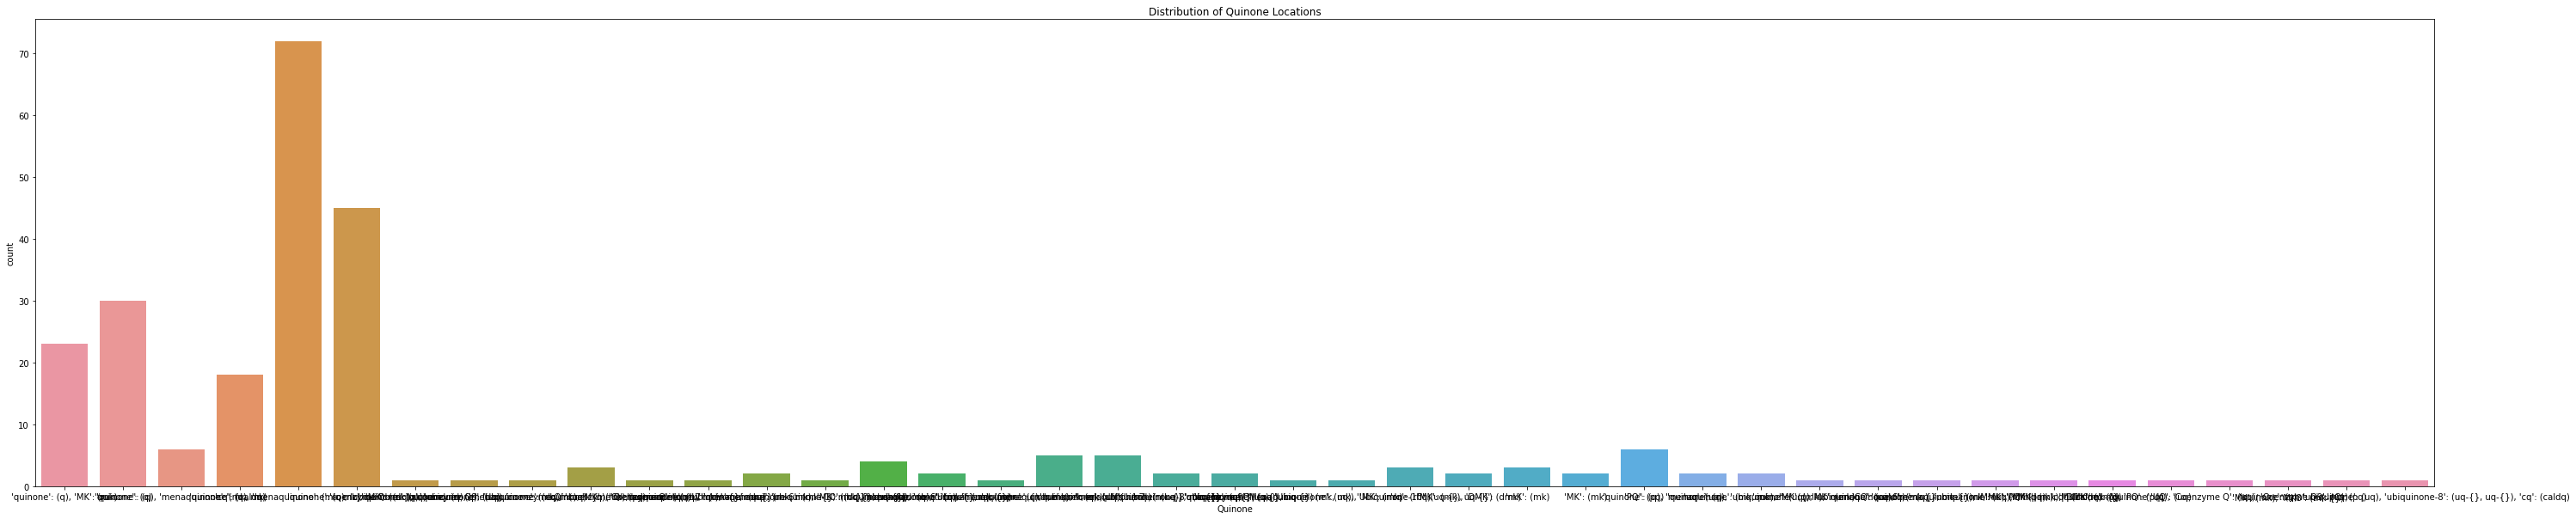

In [45]:
# Visualize the distribution of article topics, authors, and publication dates
plt.figure(figsize=(50, 10))
sns.countplot(data=df, x='Quinone')
plt.title('Distribution of Quinone Locations')
plt.show()


In [46]:
#looking at Keyword Sentence & Species and Genus
count = 0
for index, row in df.iterrows():
    count += 1
    print("%d. Title: %s \n\t Quinone Found: %s \n\t %s\n\n" % (count, row["Species and Genus"], row["Quinone"], row["Keyword Sentence"]))


1. Title: Oceanobacillus aidingensis 
	 Quinone Found: 'quinone': (q), 'MK': (mk) 
	 The diamino acid in the peptidoglycan and the major quinone system were determined to be meso-diaminopimelic acid (meso-DAP) and MK-7, respectively.; The diamino acid in the peptidoglycan and the major quinone system were determined to be meso-diaminopimelic acid (meso-DAP) and MK-7, respectively.


2. Title: Variibacter gotjawalensis 
	 Quinone Found: 'quinone': (q) 
	 The major fatty acids were identified as C18:1ω7c, C16:0 and C17:0, the predominant isoprenoid quinone as Q-10, the polar lipids as diphosphatidylglycerol, phosphatidylglycerol, phosphatidylethanolamine, phosphatidylcholine, an unidentified aminolipid and an unidentified lipid.


3. Title: Pseudonocardia bannaensis, Artemisia annua 
	 Quinone Found: 'quinone': (q), 'menaquinone': (mk, mk) 
	 The chemotaxonomic characteristics, such as cell wall diaminopimelic acid, whole-cell sugars, fatty acid components and the major menaquinones sugg

In [47]:
#TO DO
#journal name, year of pub, pubmedID
#modify dictionary
#modify the keyword search to be more specific with dictionary
#latin, looking two consecutive word that both end in latin suffix, likely species name
#-as,-us,-um,-a,-i,-enis,-ae,-es
#explore data


#distribution of letters to search for latin words
#pair of words, and then filter the search
#glue words such as "the,or,a,but,etc."
#look for words not in a dictionary
#-as,-us,-um,-a,-i,-enis,-ae,-es
#candidatus escherichia cdi
#https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?name=Elattoneura%20frenulata

In [56]:
#latin, looking two consecutive word that both end in latin suffix, likely species name
#-as,-us,-um,-a,-i,-enis,-ae,-es
import re
import pandas as pd

def species_genus_analysis(input_csv="output500.csv"):
    df = pd.read_csv(input_csv)
    latin_suffixes = r'(?:as|us|um|a|i|enis|ae|es)'
    species_pattern = re.compile(fr'\b([A-Z][a-z]+(?:{latin_suffixes}) [a-z]+(?:{latin_suffixes}))\b')
    species_counts = {}

    for _, row in df.iterrows():
        title = row["Title"]
        abstract = row["Abstract"]
        if pd.isna(abstract):
            abstract = ''
        title_abstract = title + " " + abstract
        species = species_pattern.findall(title_abstract)
        for s in species:
            species_counts[s] = species_counts.get(s, 0) + 1

    sorted_species = sorted(species_counts.items(), key=lambda x: x[1], reverse=True)
    print("Top 100 most common species:")
    for species, count in sorted_species[:100]:
        print(f"{species}: {count}")

species_genus_analysis()


Top 100 most common species:
Saccharomyces cerevisiae: 132
Escherichia coli: 119
Staphylococcus aureus: 39
Pseudomonas aeruginosa: 33
Streptomyces species: 20
Pseudomonas stutzeri: 17
Listeria monocytogenes: 16
Pichia anomala: 16
Candida species: 15
Kluyveromyces marxianus: 14
Bacillus cereus: 14
Pseudomonas putida: 12
Bacillus species: 12
Streptomyces griseus: 11
Salmonella enterica: 11
Methanosarcina barkeri: 10
Neurospora crassa: 9
Debaryomyces hansenii: 9
Yarrowia lipolytica: 9
Rhizobium leguminosarum: 9
Fusarium oxysporum: 9
Klebsiella pneumoniae: 8
Lactobacillus plantarum: 8
Lactobacillus helveticus: 8
Aspergillus terreus: 8
Rhizobium meliloti: 8
Phycomyces blakesleeanus: 8
Lipomyces starkeyi: 7
Phaffia rhodozyma: 7
Penicillium chrysogenum: 7
Rhodococcus equi: 7
Saccharomyces species: 7
Nitrosomonas eutropha: 7
Pseudomonas syringae: 7
Penicillium notatum: 6
Lactobacillus fermentum: 6
Nocardia species: 6
Jatropha curcas: 6
Aeromonas hydrophila: 6
Pichia kluyveri: 6
Lactobacillus r

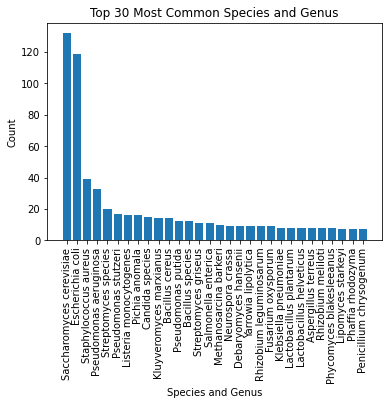

In [60]:
import re
import pandas as pd

def species_genus_analysis(input_csv="output500.csv"):
    df = pd.read_csv(input_csv)
    latin_suffixes = r'(?:as|us|um|a|i|enis|ae|es)'
    species_pattern = re.compile(fr'\b([A-Z][a-z]+(?:{latin_suffixes}) [a-z]+(?:{latin_suffixes}))\b')
    species_counts = {}

    for _, row in df.iterrows():
        title = row["Title"]
        abstract = row["Abstract"]
        if pd.isna(abstract):
            abstract = ''
        title_abstract = title + " " + abstract
        species = species_pattern.findall(title_abstract)
        for s in species:
            species_counts[s] = species_counts.get(s, 0) + 1

    sorted_species = sorted(species_counts.items(), key=lambda x: x[1], reverse=True)
    top_species = sorted_species[:30]

    species_names = [species[0] for species in top_species]
    species_counts = [species[1] for species in top_species]

    plt.bar(species_names, species_counts)
    plt.xticks(rotation=90)
    plt.xlabel('Species and Genus')
    plt.ylabel('Count')
    plt.title('Top 30 Most Common Species and Genus')
    plt.show()


species_genus_analysis()

In [51]:
##bugs
#search is unable to pick up the International Journal of Systematic and Evolutionary Microbiology
#optimize the code
    #parallize the file search
    #run the code morrowind
#do more with the abstracts
#improve how species names are collected

#hits for quinone, candidate species (two words) 
#test for 


#external validation with other members of the team
#genes -> protiens -> quinone

In [61]:
df

,Journal Name,Year of Publication,PubMedID,Title,Abstract,Quinone,Keyword Sentence,Species and Genus
50,Antonie van Leeuwenhoek,2014.0,24595860,"Oceanobacillus aidingensis sp. nov., a moderat...","Two Gram-positive, rod-shaped moderately halop...","'quinone': (q), 'MK': (mk)",The diamino acid in the peptidoglycan and the ...,Oceanobacillus aidingensis
51,Antonie van Leeuwenhoek,2014.0,24599521,"Variibacter gotjawalensis gen. nov., sp. nov.,...",A novel bacterial strain designated GJW-30(T) ...,'quinone': (q),The major fatty acids were identified as C18:1...,Variibacter gotjawalensis
57,Antonie van Leeuwenhoek,2011.0,21336595,"Pseudonocardia bannaensis sp. nov., a novel ac...",During the course of our research on new actin...,"'quinone': (q), 'menaquinone': (mk, mk)","The chemotaxonomic characteristics, such as ce...","Pseudonocardia bannaensis, Artemisia annua"
61,Antonie van Leeuwenhoek,2011.0,21359663,Microbial diversity in Frenulata (Siboglinidae...,Frenulates are a group of gutless marine annel...,'cq': (caldq),"In addition, the occurrence of the same bacter...","Microbial diversity, Frenulata , Gulf of, Cadi..."
63,Antonie van Leeuwenhoek,2014.0,24989328,"Sporosarcina siberiensis sp. nov., isolated fr...","A Gram-stain positive, non-motile, rod-shaped ...","'quinone': (q), 'menaquinone': (mk, mk), 'MK':...",The predominant menaquinone was identified as ...,"Sporosarcina siberiensis, East , Siberian"
...,...,...,...,...,...,...,...,...
1936,Antonie van Leeuwenhoek,2013.0,23549906,Saccharomonospora oceani sp. nov. isolated fro...,"Two actinomycete strains, designated YIM M1116...","'quinone': (q), 'menaquinone': (mk, mk), 'MK':...",Their predominant menaquinone was found to be ...,"Saccharomonospora oceani, Little"
1937,Antonie van Leeuwenhoek,2013.0,23553363,"Nocardioides panaciterrulae sp. nov., isolated...","A Gram-positive, coccoid to rod-shaped, non-sp...","'quinone': (q), 'menaquinone': (mk, mk), 'MK':...",Strain Gsoil 958(T) was characterized chemotax...,Nocardioides panaciterrulae
1940,Antonie van Leeuwenhoek,2013.0,23559043,Saccharopolyspora dendranthemae sp. nov. a hal...,"A halotolerant actinomycete strain, designated...","'quinone': (q), 'menaquinone': (mk, mk), 'MK':...",The predominant menaquinone was MK-9(H4).; The...,Saccharopolyspora dendranthemae
1950,Antonie van Leeuwenhoek,2012.0,22706524,"Lysobacter thermophilus sp. nov., isolated fro...","A Gram-negative and aerobic bacterium, designa...",'quinone': (q),The predominant respiratory quinone was Q-8 an...,Lysobacter thermophilus
